<a href="https://colab.research.google.com/github/AnkitaSavaliya/AIH/blob/main/DeepLearning/class/module1/lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from PIL import Image

100%|██████████| 345M/345M [01:38<00:00, 3.51MB/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 309kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 11.8MB/s]


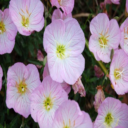

In [3]:
size = (128,128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
test_dataset = torchvision.datasets.Flowers102(root='./data', split='test', download=True, transform=transform)

def visualize_image(image):
    image = image.permute(1, 2, 0)
    image = image.numpy()
    image = (image - image.min()) / (image.max() - image.min())
    image = (image * 255).astype('uint8')
    return Image.fromarray(image)

visualize_image(train_dataset[0][0])

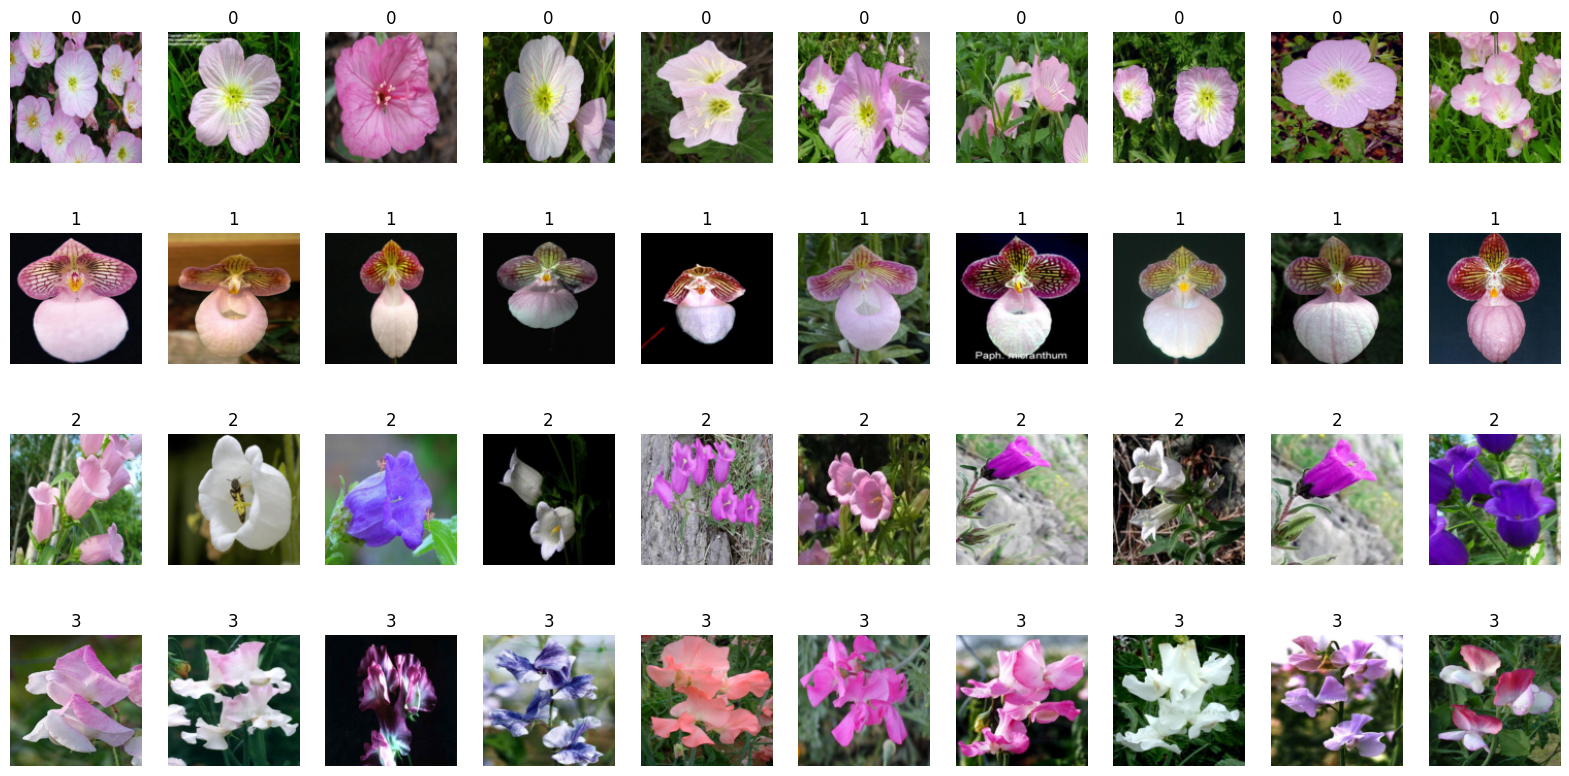

In [4]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10, figsize=(20, 10))
for i in range(40):
    ax[i // 10, i % 10].imshow(visualize_image(train_dataset[i][0]))
    ax[i // 10, i % 10].axis('off')
    ax[i // 10, i % 10].set_title(train_dataset[i][1])

In [5]:
train_dataset[0][0].shape, type(train_dataset[0][1])

(torch.Size([3, 128, 128]), int)

In [26]:
#combine all images in tensor
train_images = torch.stack([img for img, _ in train_dataset], dim=0)
train_labels = torch.tensor([label for _, label in train_dataset])
train_images.shape, train_labels.shape


(torch.Size([1020, 3, 128, 128]), torch.Size([1020]))

In [6]:
train_labels[10]

tensor(1)

In [7]:
#train_labels <= 1 creates a boolean mask, meaning
mask = train_labels <= 1
print(mask)

#Now, when we use this boolean mask to index train_labels:

train_labels_01 = train_labels[mask]
print(train_labels_01)
# Output: tensor([0, 1, 1, 0])

tensor([ True,  True,  True,  ..., False, False, False])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [27]:
train_images_01 = train_images[train_labels <= 1]
train_labels_01 = train_labels[train_labels <= 1]


In [11]:
model = torch.nn.Linear(128 * 128 * 3, 1)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0)

for epoch in range(100):
    pred_y = model(train_images_01.view(-1, 128 * 128 * 3))
    loss_value = loss(pred_y, train_labels_01.float().view(-1, 1))

    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()

    if epoch % 10 == 0:
      print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")


Epoch 1: Loss = 0.760600209236145
Epoch 11: Loss = 0.10364283621311188
Epoch 21: Loss = 0.06638266891241074
Epoch 31: Loss = 0.050549305975437164
Epoch 41: Loss = 0.04041502624750137
Epoch 51: Loss = 0.0330914668738842
Epoch 61: Loss = 0.027522152289748192
Epoch 71: Loss = 0.023148778825998306
Epoch 81: Loss = 0.019634511321783066
Epoch 91: Loss = 0.016762176528573036


In [9]:
# first prepare data(we took entire dataset, only wanted to train label 1 and 0)
# set up model, loss fn, create optimizer
# iterate over training to reduce loss


In [28]:
test_images = torch.stack([test_dataset[i][0] for i in range(100)], dim=0)  # Stack images into a tensor
test_labels = torch.tensor([test_dataset[i][1] for i in range(100)])  # Convert labels to tensor

#get subset which has label 0 or 1
test_images_01 = test_images[test_labels <= 1]
test_labels_01 = test_labels[test_labels <= 1]


In [30]:
pred_y = model(test_images_01.view(-1, 128 * 128 * 3))
loss_value = loss(pred_y, test_labels_01.float().view(-1, 1))
#print(loss_value, test_labels_01.float().view(-1, 1))

In [31]:
#Binary Logistic regression (output class 0 or 1)
train_images = torch.stack([img for img, _ in train_dataset], dim=0)
train_labels = torch.tensor([label for _, label in train_dataset])

train_images_01 = train_images[train_labels <= 1]
train_labels_01 = train_labels[train_labels <= 1]

test_images = torch.stack([test_dataset[i][0] for i in range(100)], dim=0)  # Stack images into a tensor
test_labels = torch.tensor([test_dataset[i][1] for i in range(100)])  # Convert labels to tensor

#get subset which has label 0 or 1
test_images_01 = test_images[test_labels <= 1]
test_labels_01 = test_labels[test_labels <= 1]



In [64]:
model2 = torch.nn.Linear(3*128*128,1)
loss_m2 = torch.nn.BCEWithLogitsLoss()
optimizer_m2 = torch.optim.SGD(model2.parameters(), lr=0.01, momentum=0)

In [65]:
for epoch in range(100):
    pred_y = model2(train_images_01.view(-1, 3*128*128))
    loss_value_m2 = loss_m2(pred_y, train_labels_01.float().view(-1, 1))

    optimizer_m2.zero_grad()
    loss_value_m2.backward()
    optimizer_m2.step()
    if epoch % 10 == 0:
      print(f"Epoch {epoch + 1}: Loss = {loss_value_m2.item()}")


Epoch 1: Loss = 0.7188446521759033
Epoch 11: Loss = 0.6824775338172913
Epoch 21: Loss = 0.010515013709664345
Epoch 31: Loss = 0.007763789501041174
Epoch 41: Loss = 0.0062419273890554905
Epoch 51: Loss = 0.005257408134639263
Epoch 61: Loss = 0.004559600260108709
Epoch 71: Loss = 0.004035337828099728
Epoch 81: Loss = 0.0036248795222491026
Epoch 91: Loss = 0.003293741960078478


In [53]:
pred_test = model2(test_images_01.view(-1, 3*128*128))
#loss_test = loss_m2(pred_test, test_labels_01.float().view(-1, 1))

"""
(pred_test[:, 0] > 0) creates a boolean mask, where True means the prediction is greater than 0, and False means it's not.
(pred_test[:, 0] > 0).int() converts True to 1 and False to 0.
.float() converts True to 1.0 and False to 0.0.
Now, we have a tensor of 1.0 (correct predictions) and 0.0 (incorrect predictions).

.mean() calculates the average accuracy by computing:
Number of Correct Predictions
Total Number of Predictions
Total Number of Predictions
Number of Correct Predictions """
print(((pred_test[:, 0] > 0).int() == test_labels_01).float().mean())

tensor(0.7333)


In [54]:
#Multiclass classification (can classify 102 diff flowers)

train_images = torch.stack([img for img, _ in train_dataset], dim=0)
train_labels = torch.tensor([label for _, label in train_dataset])


In [62]:
model3 = torch.nn.Linear(3*128*128, 102) #dataset has 102 types/category of flowers
model3.cuda()
train_images= train_images.cuda()
train_labels = train_labels.cuda()
loss_m3 = torch.nn.CrossEntropyLoss()
optimizer_m3 = torch.optim.SGD(model3.parameters(), lr=0.01, momentum=0)



In [67]:
for epoch in range(100):
    pred_y = model3(train_images.view(-1, 3*128*128))
    loss_value_m3 = loss_m3(pred_y, train_labels)

    optimizer_m3.zero_grad()
    loss_value_m3.backward()
    optimizer_m3.step()
    if epoch % 10 == 0:
      print(f"Epoch {epoch + 1}: Loss = {loss_value_m3.item()}")

Epoch 1: Loss = 1.1849080324172974
Epoch 11: Loss = 1.1271672248840332
Epoch 21: Loss = 1.0732988119125366
Epoch 31: Loss = 1.022985816001892
Epoch 41: Loss = 0.9759430885314941
Epoch 51: Loss = 0.931912362575531
Epoch 61: Loss = 0.8906592726707458
Epoch 71: Loss = 0.8519706130027771
Epoch 81: Loss = 0.8156524300575256
Epoch 91: Loss = 0.7815283536911011


In [74]:
test_images = torch.stack([test_dataset[i][0] for i in range(1000)], dim=0).cuda()  # Stack images into a tensor
test_labels = torch.tensor([test_dataset[i][1] for i in range(1000)]).cuda()  # Convert labels to tensor


In [75]:
pred_test = model3(test_images.view(-1, 3*128*128))
print(((pred_test.argmax(dim=1) == test_labels).float().mean()))

tensor(0.1840, device='cuda:0')
